In [3]:
#Imports
import pandas as pd
import numpy as np

In [ ]:
####Read file options

# Read data from urls and save in csv files. 

tb_deaths_url_csv = 'https://docs.google.com/spreadsheets/d/12uWVH_IlmzJX_75bJ3IH5E-Gqx6-zfbDKNvZqYjUuso/pub?gid=0&output=CSV'
tb_existing_url_csv = 'https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0&output=csv'
tb_new_url_csv = 'https://docs.google.com/spreadsheets/d/1Pl51PcEGlO9Hp4Uh0x2_QM0xVb53p2UDBMPwcnSjFTk/pub?gid=0&output=csv'

local_tb_deaths_file = your_local_path+'tb_deaths_100.csv'
local_tb_existing_file = your_local_path+'tb_existing_100.csv'
local_tb_new_file = your_local_path+'tb_new_100.csv'

deaths_f = urllib.request.urlretrieve(tb_deaths_url_csv, local_tb_deaths_file)
existing_f = urllib.request.urlretrieve(tb_existing_url_csv, local_tb_existing_file)
new_f = urllib.request.urlretrieve(tb_new_url_csv, local_tb_new_file)

In [ ]:
####Read file local path with different kind of separators
# Load the users data
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(your_local_path+'u.user', sep='|', names=u_cols,encoding='latin-1')

# Load the ratings data
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(your_local_path+'u.data', sep='\t', names=r_cols,encoding='latin-1')

In [11]:
#Dataframe functions
root="C:/Users/User/Documents/upxproject/"
#root="/Users/jasontam/Documents/Upx/Fundamental_Projects/attachment_Project_5_Facebook_data/Project_5_Facebook data/"
fbdata = pd.read_table(root+"pseudo_facebook.tsv")
"""Sample Data"""
print("Sample Data")
fbdata.head() # to select top elements
fbdata.shape # to view the column and row size
fbdata.info # to view all data
fbdata.dtypes # to data type of columns
#fbdata.describe() # to get count, mean , std, manx or min
fbdata.tail() # get the last n records

Sample Data


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [13]:
# More conditions - selecting data based on condition
fbdata[(fbdata.age < 40) & (fbdata.dob_month > 4)].head(3)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0


In [14]:
#indexing a column
# Create the index for the users dataset. Can run only once, do not run more than once, else you shall get an error.
fbdata.set_index('userid', inplace=False)
fbdata.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [ ]:
#Merge multiple data frames
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)
#Group by using a column, get the count and then sort in descending order. 
most_rated = lens.groupby('title').size().sort_values(ascending=False)
# mean/max/min/total/aggregate using a rating field
highest_ratings = lens.groupby('title').agg({'rating':[np.size,np.mean,np.max,np.min]})

[0, 5, 0, 35000]

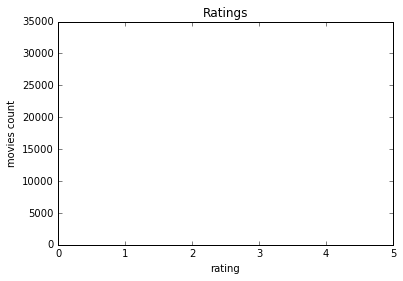

In [16]:
#Plotting a graph
import matplotlib.pyplot as plt
% matplotlib inline
plt.plot([10,20],[10,20],'ro')
plt.title("Distribution of users' ages") 
plt.ylabel('count of users')
fbdata.age.plot.hist(bins=5) ###Plot a histogram
plt.title("Ratings") 
plt.ylabel('movies count') 
plt.xlabel('rating') 
plt.axis([0,5,0,35000])

# Let us create buckets age-wise
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens.head(1)